In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_m30.csv")

In [3]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [4]:
df_original = df

del df['open']
del df['high']
del df['low']

In [5]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [6]:
df.isna().sum()

time            0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [7]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.293720
10    1.293575
11    1.293364
12    1.293279
13    1.293169
14    1.293038
15    1.292955
16    1.293033
17    1.293106
18    1.293278
19    1.293424
Name: SMA10, dtype: float64

In [8]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.293572
20    1.293646
21    1.293708
22    1.293749
23    1.293770
24    1.293792
25    1.293845
26    1.293877
27    1.293910
28    1.293944
29    1.293951
Name: SMA20, dtype: float64

In [9]:
df

,time,close,real_volume,SMA10,SMA20
0,2012-01-02 00:00:00,1.29419,0,NaN,NaN
1,2012-01-02 00:30:00,1.29429,0,NaN,NaN
2,2012-01-02 01:00:00,1.29413,0,NaN,NaN
3,2012-01-02 01:30:00,1.29410,0,NaN,NaN
4,2012-01-02 02:00:00,1.29422,0,NaN,NaN
...,...,...,...,...,...
123676,2021-12-30 22:00:00,1.13244,0,1.131769,1.132157
123677,2021-12-30 22:30:00,1.13193,0,1.131655,1.132171
123678,2021-12-30 23:00:00,1.13269,0,1.131674,1.132187
123679,2021-12-30 23:30:00,1.13257,0,1.131763,1.132186


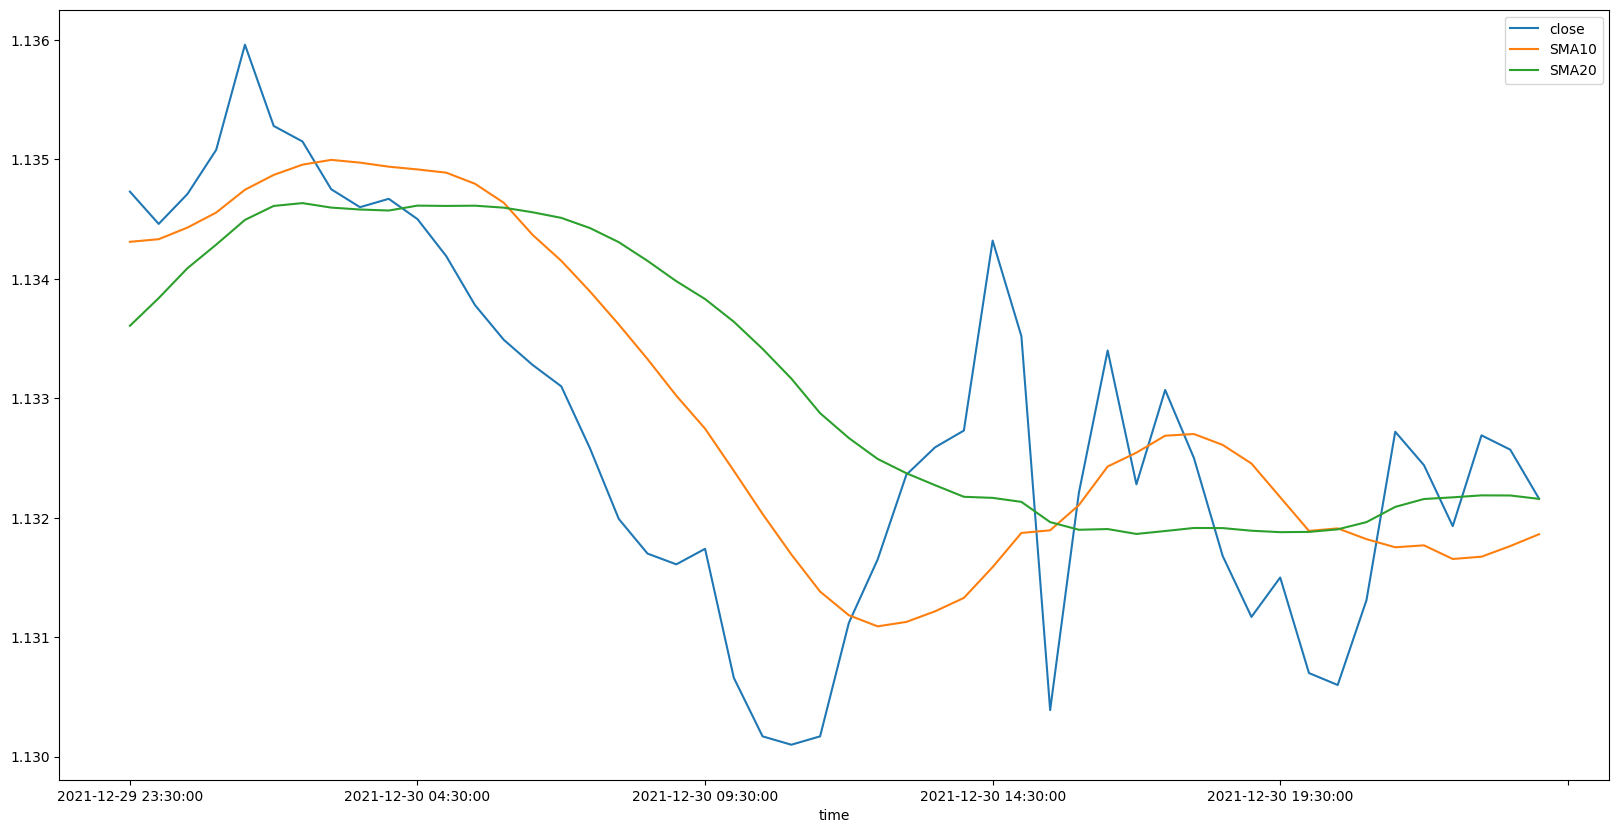

In [10]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [11]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [12]:
df['Signal'].value_counts()

1.0    61876
0.0    61755
Name: Signal, dtype: int64

In [13]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [14]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [15]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
123631,2021-12-29 23:30:00,1.13473,0,1.134310,1.133607,1.0,NaN,NaN,NaN
123632,2021-12-30 00:00:00,1.13446,0,1.134332,1.133838,1.0,NaN,NaN,NaN
123633,2021-12-30 00:30:00,1.13471,0,1.134429,1.134089,1.0,NaN,NaN,NaN
123634,2021-12-30 01:00:00,1.13508,0,1.134555,1.134286,1.0,NaN,NaN,NaN
123635,2021-12-30 01:30:00,1.13596,0,1.134746,1.134494,1.0,NaN,NaN,NaN
123636,2021-12-30 02:00:00,1.13528,0,1.134870,1.134610,1.0,NaN,NaN,NaN
123637,2021-12-30 02:30:00,1.13515,0,1.134956,1.134634,1.0,NaN,NaN,NaN
123638,2021-12-30 03:00:00,1.13475,0,1.134996,1.134597,1.0,NaN,NaN,NaN
123639,2021-12-30 03:30:00,1.13460,0,1.134973,1.134580,1.0,NaN,NaN,NaN
123640,2021-12-30 04:00:00,1.13467,0,1.134939,1.134572,1.0,NaN,NaN,NaN


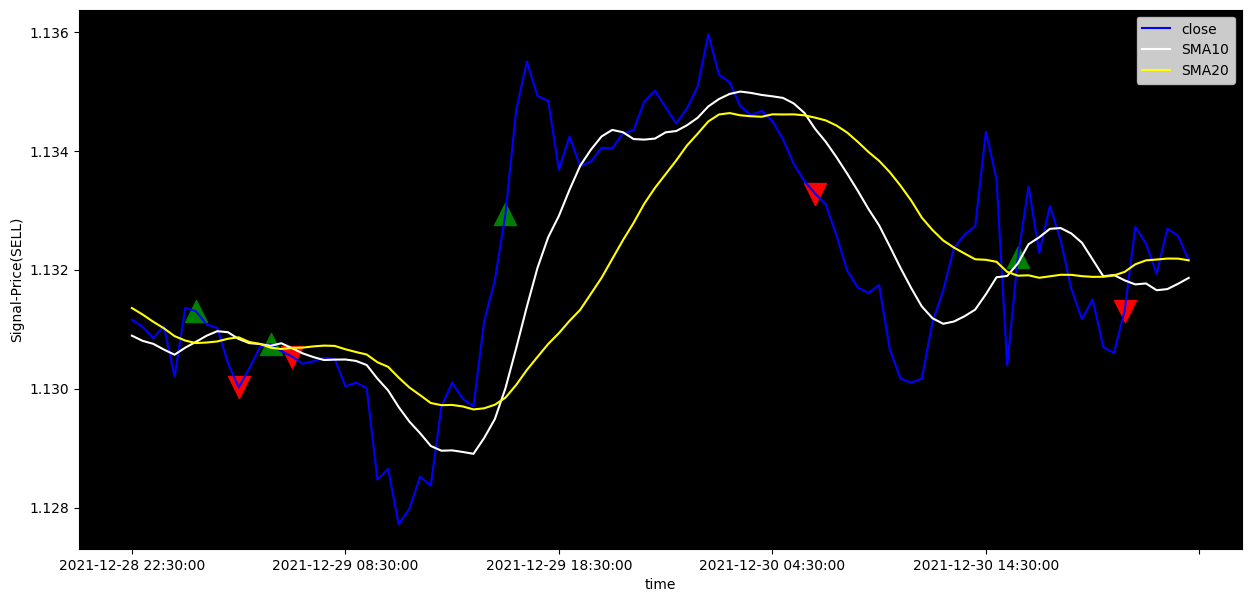

In [16]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [17]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
123631,2021-12-29 23:30:00,1.13473,0,1.134310,1.133607,1.0,NaN,NaN,NaN
123632,2021-12-30 00:00:00,1.13446,0,1.134332,1.133838,1.0,NaN,NaN,NaN
123633,2021-12-30 00:30:00,1.13471,0,1.134429,1.134089,1.0,NaN,NaN,NaN
123634,2021-12-30 01:00:00,1.13508,0,1.134555,1.134286,1.0,NaN,NaN,NaN
123635,2021-12-30 01:30:00,1.13596,0,1.134746,1.134494,1.0,NaN,NaN,NaN
123636,2021-12-30 02:00:00,1.13528,0,1.134870,1.134610,1.0,NaN,NaN,NaN
123637,2021-12-30 02:30:00,1.13515,0,1.134956,1.134634,1.0,NaN,NaN,NaN
123638,2021-12-30 03:00:00,1.13475,0,1.134996,1.134597,1.0,NaN,NaN,NaN
123639,2021-12-30 03:30:00,1.13460,0,1.134973,1.134580,1.0,NaN,NaN,NaN
123640,2021-12-30 04:00:00,1.13467,0,1.134939,1.134572,1.0,NaN,NaN,NaN


In [18]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [19]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [20]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-02 09:30:00,1.29401,0,1.293424,1.293572,0.0,0.0,NaN,1.29401,NaN
20,2012-01-02 10:00:00,1.29567,0,1.293717,1.293646,1.0,1.0,1.29567,NaN,-0.00166
31,2012-01-02 15:30:00,1.29319,0,1.294002,1.294027,0.0,0.0,NaN,1.29319,-0.00248
46,2012-01-02 23:00:00,1.29343,0,1.292827,1.292806,1.0,1.0,1.29343,NaN,-0.00024
97,2012-01-04 00:30:00,1.30529,0,1.305255,1.305272,0.0,0.0,NaN,1.30529,0.01186
...,...,...,...,...,...,...,...,...,...,...
123596,2021-12-29 06:00:00,1.13054,0,1.130681,1.130685,0.0,0.0,NaN,1.13054,-0.00021
123616,2021-12-29 16:00:00,1.13294,0,1.130009,1.129849,1.0,1.0,1.13294,NaN,-0.00240
123645,2021-12-30 06:30:00,1.13328,0,1.134369,1.134558,0.0,0.0,NaN,1.13328,0.00034
123664,2021-12-30 16:00:00,1.13221,0,1.132106,1.131899,1.0,1.0,1.13221,NaN,0.00107


In [21]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [22]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
97,2012-01-04 00:30:00,1.30529,0,1.305255,1.305272,0.0,0.0,NaN,1.30529,0.01186,Profit
118,2012-01-04 11:00:00,1.30301,0,1.303833,1.303810,1.0,1.0,1.30301,NaN,0.00228,Profit
142,2012-01-04 23:00:00,1.29396,0,1.294255,1.294064,1.0,1.0,1.29396,NaN,0.00740,Profit
196,2012-01-06 02:00:00,1.27929,0,1.279043,1.278983,1.0,1.0,1.27929,NaN,0.01293,Profit
255,2012-01-09 08:00:00,1.27246,0,1.270229,1.269890,1.0,1.0,1.27246,NaN,0.00249,Profit
...,...,...,...,...,...,...,...,...,...,...,...
123421,2021-12-23 10:30:00,1.13145,0,1.133312,1.133458,0.0,0.0,NaN,1.13145,0.00140,Profit
123495,2021-12-27 03:30:00,1.13184,0,1.131871,1.131826,1.0,1.0,1.13184,NaN,0.00025,Profit
123506,2021-12-27 09:00:00,1.13224,0,1.131924,1.131932,0.0,0.0,NaN,1.13224,0.00040,Profit
123645,2021-12-30 06:30:00,1.13328,0,1.134369,1.134558,0.0,0.0,NaN,1.13328,0.00034,Profit


In [23]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
123631,2021-12-29 23:30:00,1.13473,0,1.134310,1.133607,1.0,NaN,NaN,NaN,NaN,NaN
123632,2021-12-30 00:00:00,1.13446,0,1.134332,1.133838,1.0,NaN,NaN,NaN,NaN,NaN
123633,2021-12-30 00:30:00,1.13471,0,1.134429,1.134089,1.0,NaN,NaN,NaN,NaN,NaN
123634,2021-12-30 01:00:00,1.13508,0,1.134555,1.134286,1.0,NaN,NaN,NaN,NaN,NaN
123635,2021-12-30 01:30:00,1.13596,0,1.134746,1.134494,1.0,NaN,NaN,NaN,NaN,NaN
123636,2021-12-30 02:00:00,1.13528,0,1.134870,1.134610,1.0,NaN,NaN,NaN,NaN,NaN
123637,2021-12-30 02:30:00,1.13515,0,1.134956,1.134634,1.0,NaN,NaN,NaN,NaN,NaN
123638,2021-12-30 03:00:00,1.13475,0,1.134996,1.134597,1.0,NaN,NaN,NaN,NaN,NaN
123639,2021-12-30 03:30:00,1.13460,0,1.134973,1.134580,1.0,NaN,NaN,NaN,NaN,NaN
123640,2021-12-30 04:00:00,1.13467,0,1.134939,1.134572,1.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']